In [1]:
%matplotlib inline
import gym
import matplotlib.pyplot as plt
import numpy as np


In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
directory = '/home/misha/downloads/unsupervised_learning/cpc/notebooks/'
datafile = 'safety_gym_point_100paths_25len_v2.npy'

data = np.load(directory+datafile,allow_pickle=True)
all_coords = data.item().get('coordinates')

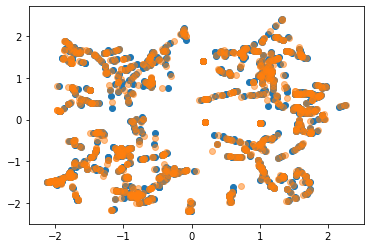

In [76]:
meta = data.item().get('meta')

num_paths = meta.item().get('num_paths')
path_len = meta.item().get('path_len')

batch_size = 1000

k = np.random.choice(range(num_paths),size=batch_size,replace=True)
#k = np.random.randint(0,num_paths,size=batch_size)
i = np.random.randint(0,path_len-1,size=batch_size)
j = i+1

anchor_ids = k*path_len + i
positive_ids = k*path_len + j
xy = all_coords[anchor_ids]
x = xy[:,:1]
y = xy[:,1:2]
plt.scatter(x,y)
xy = all_coords[positive_ids]
x = xy[:,:1]
y = xy[:,1:2]
plt.scatter(x,y,alpha=.5)

In [77]:
i=0

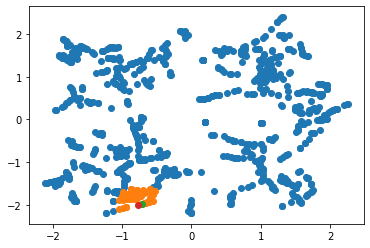

In [78]:
data_size = len(all_coords)
negative_idx = np.random.choice(data_size, size=batch_size*2)
negative_positions = all_coords[negative_idx]
a = anchor_ids[i]
b = positive_ids[i]

anchor_position = all_coords[a]
#print(anchor_position,a)
tau = .4
true_negatives_j = np.argwhere(np.linalg.norm(negative_positions - anchor_position,axis=1) > tau)
false_negatives_j = np.argwhere(np.linalg.norm(negative_positions - anchor_position,axis=1) <= tau)
true_negatives_ids = negative_idx[true_negatives_j].reshape(-1)[:batch_size]
false_negatives_ids = negative_idx[false_negatives_j].reshape(-1)[:batch_size]

xy = all_coords[true_negatives_ids]
#print(xy.shape,xy[:,:1],xy[:,1:2])
plt.scatter(xy[:,:1],xy[:,1:2])

xy = all_coords[false_negatives_ids]

plt.scatter(xy[:,:1],xy[:,1:2])
plt.scatter(all_coords[a][0],all_coords[a][1])
plt.scatter(all_coords[b][0],all_coords[b][1])

#plt.scatter(all_coords[i][0],all_coords[i][1])
i+=1 

In [143]:
from models import VAE, CPC, Classifier, Actor, get_score
import torch
c_arch = "cnn-3-32-64-128-256"
d_arch = "cnn-512-256-128-64-32-3"
e_arch = "cnn-3-32-64-128-256-512"
z_dim = 32
conditional = False
freeze_enc = False

model = model = VAE(e_arch, d_arch, z_dim, conditional,img_size=(64,64))
c_model = CPC('cpc', c_arch, e_arch, z_dim, model.encoder, conditional, freeze_enc, img_size=(64,64))

c_model_path = '/home/misha/downloads/hallucinative-topological-memory/out/cpc/var/cpc-1-last-5'
c_model.load_state_dict(torch.load(c_model_path))


Encoder:  Sequential(
  (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (Conv2d0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (BatchNorm0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (LeakyReLU0): LeakyReLU(negative_slope=0.1, inplace=True)
  (Conv2d1): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (BatchNorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (LeakyReLU1): LeakyReLU(negative_slope=0.1, inplace=True)
  (Conv2d2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (BatchNorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (LeakyReLU2): LeakyReLU(negative_slope=0.1, inplace=True)
  (Conv2d3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (BatchNorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (Leak

<All keys matched successfully>

In [165]:
observations = data.item().get('top_views')
i = 0
ids = np.random.choice(range(len(observations)),size=500)
subset = observations[ids]

anchor = torch.from_numpy(np.repeat(subset[20,None],len(ids),0)).float().permute(0,3,1,2)
rest = torch.from_numpy(subset).float().permute(0,3,1,2)
scores = get_score(c_model,anchor,rest,type='all')

In [166]:
scores.keys()

dict_keys(['exp-neg', 'sig-neg', 'sig-neg-10', 'raw', 'sigmoid'])

-76.48246 61.84961


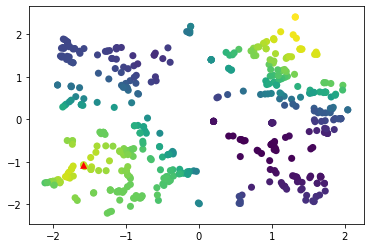

In [167]:

xy = all_coords[ids]
x = xy[:,:1].reshape(-1)
y = xy[:,1:2].reshape(-1)
z = scores['raw']

print(z.min(),z.max())
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50, edgecolor='')
ax.scatter(x[i], y[i], c='r', s=50, edgecolor='',marker='^')

plt.show()
#i+=1

In [12]:
t1 = torch.from_numpy(observations[-200,None]).float().permute(0,3,1,2)
t2 = torch.from_numpy(observations[400,None]).float().permute(0,3,1,2)

get_score(c_model,t1,t2,type='all')

{'exp-neg': 1.1889791,
 'sig-neg': 0.5431660588812659,
 'sig-neg-10': 0.8495340512566971,
 'raw': array(-0.17309512, dtype=float32),
 'sigmoid': 0.4568339540916242}

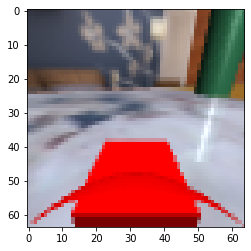

In [14]:
plt.imshow(observations[0,...,:3])

In [15]:
observations = data.item().get('observations')
observations.shape

(1000, 64, 64, 3)

In [124]:
some = list(observations.shape)
some[0] =1
some

[1, 64, 64, 3]

In [ ]:
;ph vhgvfcx